# belosgraficos instagram.com/belosgraficos/

#### Notebook para a criação de gráficos utilizando os dados do Gapminder

### Comentários estão em português - Comments are in Portuguese

## Notebook criado utilizando o Kaggle
#### Dados: https://www.gapminder.org/data/

Importando as bibliotecas necessarias para a execução do código

In [51]:
# Verifica se a biblioteca já está instanada, caso não estiver, instala a biblioteca
if("dplyr" %in% rownames(installed.packages()) == FALSE) {install.packages("dplyr")}
if("ggthemes" %in% rownames(installed.packages()) == FALSE) {install.packages("ggthemes")}
if("png" %in% rownames(installed.packages()) == FALSE) {install.packages("png")}

library(dplyr)
library(ggplot2)
library(png)
library(ggthemes)
library(tidyr)
library(readr)

library(hrbrthemes)
library(viridis)

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite



Lendo o arquivo de dados

In [8]:
# Carregando os arquivos para a criação do dataset de trabalho
dados_paises <- read_csv('../input/gapminder/ddf--entities--geo--country.csv')
gdp_per_capita <- read_csv('../input/gapminder/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
expec_vida <- read_csv('../input/gapminder/life_expectancy_years.csv')
pop_total <- read_csv('../input/gapminder/population_total.csv')

# Verificando os arquivos carregados
head(dados_paises)
head(gdp_per_capita)
head(expec_vida)
head(pop_total)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `is--country` = col_logical(),
  iso3166_1_numeric = col_double(),
  latitude = col_double(),
  longitude = col_double(),
  un_state = col_logical()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  country = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  country = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  country = col_character()
)
ℹ Use `spec()` for the full column specifications.




country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,⋯,longitude,main_religion_2008,name,un_sdg_ldc,un_sdg_region,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>
abkh,others,NA,NA,TRUE,NA,NA,NA,NA,NA,⋯,NA,NA,Abkhazia,NA,NA,FALSE,NA,NA,europe,europe_central_asia
abw,others,high_income,high_income,TRUE,AW,ABW,533,NA,coastline,⋯,-69.96667,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,FALSE,NA,AW,americas,america
afg,g77,low_income,low_income,TRUE,AF,AFG,4,NA,landlocked,⋯,66.00000,muslim,Afghanistan,un_least_developed,un_central_and_southern_asia,TRUE,sa,AF,asia,south_asia
ago,g77,middle_income,lower_middle_income,TRUE,AO,AGO,24,NA,coastline,⋯,18.50000,christian,Angola,un_least_developed,un_sub_saharan_africa,TRUE,ssa,AO,africa,sub_saharan_africa
aia,others,NA,NA,TRUE,AI,AIA,660,NA,coastline,⋯,-63.05000,christian,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,FALSE,NA,AI,americas,america
akr_a_dhe,others,NA,NA,TRUE,NA,NA,NA,NA,coastline,⋯,NA,NA,Akrotiri and Dhekelia,NA,NA,FALSE,NA,NA,europe,europe_central_asia


country,1800,1801,1802,1803,1804,1805,1806,1807,1808,⋯,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,603,603,603,603,603,603,603,603,603,⋯,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
Albania,667,667,667,667,667,668,668,668,668,⋯,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
Algeria,715,716,717,718,719,720,721,722,723,⋯,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,⋯,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
Angola,618,620,623,626,628,631,634,637,640,⋯,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310
Antigua and Barbuda,757,757,757,757,757,757,757,758,758,⋯,28800,29400,30000,30600,31200,31800,32500,33100,33800,34500


country,1800,1801,1802,1803,1804,1805,1806,1807,1808,⋯,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,⋯,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,⋯,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,⋯,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
Andorra,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,⋯,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,⋯,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0


country,1800,1801,1802,1803,1804,1805,1806,1807,1808,⋯,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,⋯,7.66e+07,7.64e+07,7.63e+07,7.61e+07,7.60e+07,7.58e+07,7.56e+07,7.54e+07,7.52e+07,7.49e+07
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,⋯,1.33e+06,1.30e+06,1.27e+06,1.25e+06,1.22e+06,1.19e+06,1.17e+06,1.14e+06,1.11e+06,1.09e+06
Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,⋯,7.04e+07,7.05e+07,7.05e+07,7.06e+07,7.07e+07,7.07e+07,7.07e+07,7.07e+07,7.07e+07,7.07e+07
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,⋯,6.30e+04,6.29e+04,6.29e+04,6.28e+04,6.27e+04,6.27e+04,6.26e+04,6.25e+04,6.25e+04,6.24e+04
Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,⋯,1.68e+08,1.70e+08,1.72e+08,1.75e+08,1.77e+08,1.79e+08,1.82e+08,1.84e+08,1.86e+08,1.88e+08
Antigua and Barbuda,37000,37000,37000,37000,37000,37000,37000,37000,37000,⋯,1.05e+05,1.04e+05,1.04e+05,1.04e+05,1.04e+05,1.03e+05,1.03e+05,1.03e+05,1.02e+05,1.02e+05


Preparando os dados para a criação do gráfico

In [27]:
# Como utilizaremos apenas o ano de 2020, vamos filtrar os dados pela coluna do ano de 2020
gdp_per_capita <- gdp_per_capita %>%
                      select('country', '2020')
expec_vida <- expec_vida %>%
                  select('country', '2020')
pop_total <- pop_total %>%
                 select('country', '2020')

In [31]:
# No arquivo de informações gerais, vamos selecionar apenas o nome do país e a sua região para podermos dar cores ao gráfico
dados_paises <- dados_paises %>%
                  select('name', 'world_4region')

In [32]:
# Verificando os dados
head(dados_paises)
head(gdp_per_capita)
head(expec_vida)
head(pop_total)

name,world_4region
<chr>,<chr>
Abkhazia,europe
Aruba,americas
Afghanistan,asia
Angola,africa
Anguilla,americas
Akrotiri and Dhekelia,europe


country,2020
<chr>,<dbl>
Afghanistan,1800
Albania,13200
Algeria,14000
Andorra,55000
Angola,5440
Antigua and Barbuda,25000


country,2020
<chr>,<dbl>
Afghanistan,64.4
Albania,78.6
Algeria,78.3
Andorra,NA
Angola,65.4
Antigua and Barbuda,77.4


country,2020
<chr>,<dbl>
Afghanistan,38900000
Albania,2880000
Algeria,43900000
Andorra,77300
Angola,32900000
Antigua and Barbuda,97900


In [35]:
# Para trabalharmos de forma mais facil com esse dataset, precisamos diminuir suas dimensões, então vamos "derreter" as variaveis dos anos em uma única coluna
gdp_per_capita_melted <- gdp_per_capita %>%
                         gather(key = 'ano', value = "gdppc", '2020', as.numeric()) 

expec_vida_melted <- expec_vida %>%
                         gather(key = 'ano', value = "expec_vida", '2020', as.numeric()) 
pop_total_melted <- pop_total %>%
                         gather(key = 'ano', value = "pop_total", '2020', as.numeric()) 

# Verificando os dados
head(gdp_per_capita_melted)
head(expec_vida_melted)
head(pop_total_melted)

country,ano,gdppc
<chr>,<chr>,<dbl>
Afghanistan,2020,1800
Albania,2020,13200
Algeria,2020,14000
Andorra,2020,55000
Angola,2020,5440
Antigua and Barbuda,2020,25000


country,ano,expec_vida
<chr>,<chr>,<dbl>
Afghanistan,2020,64.4
Albania,2020,78.6
Algeria,2020,78.3
Andorra,2020,NA
Angola,2020,65.4
Antigua and Barbuda,2020,77.4


country,ano,pop_total
<chr>,<chr>,<dbl>
Afghanistan,2020,38900000
Albania,2020,2880000
Algeria,2020,43900000
Andorra,2020,77300
Angola,2020,32900000
Antigua and Barbuda,2020,97900


In [48]:
# Juntando todos os dados em um único dataset
dataset <- inner_join(gdp_per_capita_melted, expec_vida_melted, by=c("country","ano"))
dataset <- inner_join(dataset, pop_total_melted, by=c("country","ano"))
dataset <- inner_join(dataset, dados_paises, by=c("country" = "name"))

# Verificando os dados
head(dataset)

country,ano,gdppc,expec_vida,pop_total,world_4region
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,2020,1800,64.4,38900000,asia
Albania,2020,13200,78.6,2880000,europe
Algeria,2020,14000,78.3,43900000,africa
Andorra,2020,55000,NA,77300,europe
Angola,2020,5440,65.4,32900000,africa
Antigua and Barbuda,2020,25000,77.4,97900,americas


Criando o gráfico

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


png 
  2

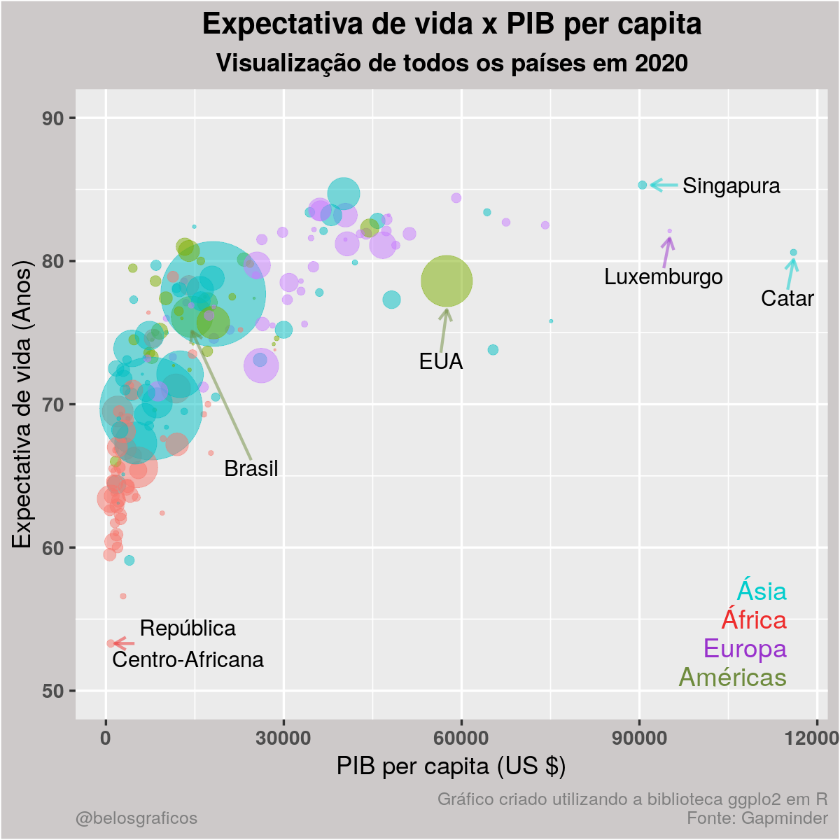

In [191]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "gapminder_ggplot.png"
fig_width = 1200
fig_height = 1200

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = gdppc,
                    y = expec_vida,
                    color = world_4region,
                    size = pop_total,
                    palette = 'Set1')) +
  
  # Adicionando camada: Boxplot
    geom_point(alpha = 0.5) + 

  # Aumentando a escala
    scale_size(range = c(1, 70)) +

  # Definindo o tema
    theme_gray(base_size = 35) +  
    theme(legend.position = "", # Remove a legenda
        
        # Título dos eixos em negrito
        axis.text.x = element_text(face = "bold"), 
        axis.text.y = element_text(face = "bold"),
        
        # Título e subtitulo do gráfico centralizados e em negrito
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5, face = "bold"),
        
        # Cores de fundo da figura e da área do gráfico
        plot.background = element_rect(fill = "snow3"),
                
        # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
        plot.caption = element_text(color = 'gray50', hjust = c(0,1), size = 25)) +

# Configurações do eixo Y
scale_y_continuous(breaks = seq(50,90, by = 10), 
                   limits = c(50,90)) + 

# Definindo os labels
    labs(x = "PIB per capita (US $)",
         y = "Expectativa de vida (Anos)", 
         title = "Expectativa de vida x PIB per capita",
         subtitle = "Visualização de todos os países em 2020",
         caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nFonte: Gapminder")) +
  
# Criando uma legenda interna no gráfico de forma manual
annotate("text",
         x = 115000, 
         y = 57,
         label = 'Ásia',
         hjust = 1, size = 13, color = 'cyan3') +
annotate("text",
         x = 115000, 
         y = 55,
         label = 'África',
         hjust = 1, size = 13, color = 'firebrick2') + 
annotate("text",
         x = 115000, 
         y = 53,
         label = 'Europa',
         hjust = 1, size = 13, color = 'darkorchid') + 
annotate("text",
         x = 115000, 
         y = 51,
         label = 'Américas',
         hjust = 1, size = 13, color = 'darkolivegreen4') +
  
# Textos auxiliares no gráfico
annotate("segment",
         x = 115000, xend = 116000,
         y = 78, yend = 80.6 - 0.5,
         size = 2, color = 'cyan3',
         alpha = 0.5, arrow=arrow()) + 
annotate("text",
         x = 115000, 
         y = 78,
         label = 'Catar',
         hjust = 0.5, vjust = 1, size = 11, color = 'black') +

annotate("segment",
         x = 95100-1000, xend = 95100,
         y = 82.1-2.6, yend = 82.1 - 0.5,
         size = 2, color = 'darkorchid',
         alpha = 0.5, arrow=arrow()) + 
annotate("text",
         x = 95100-1000, 
         y = 82.1-2.6,
         label = 'Luxemburgo',
         hjust = 0.5, vjust = 1, size = 11, color = 'black') + 

annotate("segment",
         x = 90500+6000, xend = 92000,
         y = 85.3, yend = 85.3,
         size = 2, color = 'cyan3',
         alpha = 0.5, arrow=arrow()) + 
annotate("text",
         x = 90500+15000, 
         y = 85.3,
         label = 'Singapura',
         hjust = 0.5, vjust = 0.5, size = 11, color = 'black') + 

annotate("segment",
         x = 57500-1000, xend = 57500,
         y = 78.6-5, yend = 78.6 - 2,
         size = 2, color = 'darkolivegreen4',
         alpha = 0.5, arrow=arrow()) + 
annotate("text",
         x = 57500-1000, 
         y = 78.6-5,
         label = 'EUA',
         hjust = 0.5, vjust = 1, size = 11, color = 'black') + 

annotate("segment",
         x = 14500+10000, xend = 14500,
         y = 76.1-10, yend = 76.1 - 1,
         size = 2, color = 'darkolivegreen4',
         alpha = 0.5, arrow=arrow()) + 
annotate("text",
         x = 14500+10000, 
         y = 76.1-10,
         label = 'Brasil',
         hjust = 0.5, vjust = 1, size = 11, color = 'black') + 

annotate("segment",
         x = 817+4000, xend = 1500,
         y = 53.3, yend = 53.3,
         size = 2, color = 'firebrick2',
         alpha = 0.5, arrow=arrow()) + 
annotate("text",
         x = 817+13000, 
         y = 53.3,
         label = 'República\nCentro-Africana',
         hjust = 0.5, vjust = 0.5, size = 11, color = 'black')

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)